In [17]:
import source.prepare_data as prd
import source.dataset as dat
import source.multi_layer_perceptron as mlp
import source.table as tb
import source.comparision as comp
import source.recurent_neural_networks as rnn

In [2]:
import pandas as pd
import spacy
from importlib import reload
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [3]:
reload(prd)
reload(dat)
reload(mlp)
reload(tb)
reload(comp)

<module 'source.comparision' from 'C:\\Python_files\\DL_final2\\source\\comparision.py'>

In [4]:
"""
1) Preprocessing
"""
# load models and dataset
df = pd.read_csv("hf://datasets/gxb912/large-twitter-tweets-sentiment/train.csv", nrows=100)
nlp = spacy.load("en_core_web_sm")

In [5]:
# prepare dataset
df = prd.prepare_df(df, nlp)

# create dataset out of cleaned columns
dataset = dat.Text_Dataset(df, col_text="clean_text_str", col_label="sentiment", args={"max_features":5000})
dataset.split_dataset()


In [32]:
X_train_TF, X_test_TF, Y_train_TF, Y_test_TF = dataset.get_encodings(tdidf=True)

mlp_tdidf_params = mlp.find_best_mlp(X_train=X_train_TF,
                                     Y_train=Y_train_TF,
                                     X_test=X_test_TF,
                                     Y_test=Y_test_TF,
                                     n_trials=7)

[I 2025-06-18 11:14:02,159] A new study created in memory with name: mlp_optimization
[I 2025-06-18 11:14:02,696] Trial 0 finished with values: [0.7039019465446472, 0.550000011920929] and parameters: {'epochs': 109, 'learning_rate': 0.0010090673382862306, 'units': 3}.
[I 2025-06-18 11:14:03,341] Trial 1 finished with values: [0.6907943487167358, 0.550000011920929] and parameters: {'epochs': 163, 'learning_rate': 0.06006648508660184, 'units': 6}.
[I 2025-06-18 11:14:04,003] Trial 2 finished with values: [0.6870597004890442, 0.550000011920929] and parameters: {'epochs': 176, 'learning_rate': 0.07127834039503608, 'units': 3}.


[I 2025-06-18 11:14:04,614] Trial 3 finished with values: [0.6890912055969238, 0.6000000238418579] and parameters: {'epochs': 157, 'learning_rate': 0.4432711175250896, 'units': 5}.


[I 2025-06-18 11:14:05,182] Trial 4 finished with values: [0.6768187284469604, 0.6000000238418579] and parameters: {'epochs': 134, 'learning_rate': 0.363623490990438, 'units': 4}.
[I 2025-06-18 11:14:05,842] Trial 5 finished with values: [0.7047067880630493, 0.6000000238418579] and parameters: {'epochs': 179, 'learning_rate': 0.44668373973352304, 'units': 3}.
[I 2025-06-18 11:14:06,540] Trial 6 finished with values: [0.6830264329910278, 0.5] and parameters: {'epochs': 197, 'learning_rate': 0.3417516190769708, 'units': 5}.


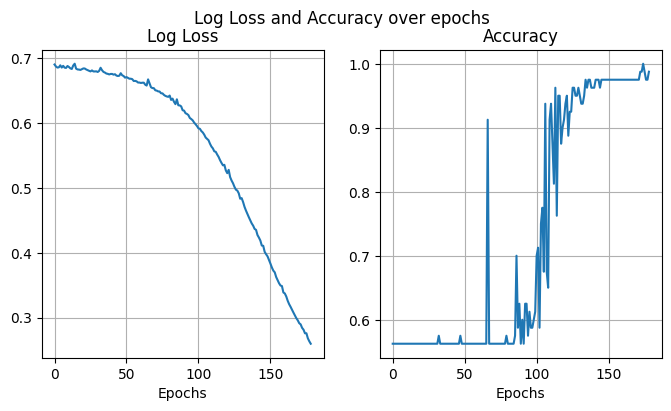

In [33]:
mlp_tdidf = mlp.Feedforward_Model(X_train_TF, Y_train_TF, units=mlp_tdidf_params.iloc[-1]['params_units']) # the last one is the best one
mlp_tdidf.train(LR=mlp_tdidf_params.iloc[-1]['params_learning_rate'], epochs=mlp_tdidf_params.iloc[-1]['params_epochs'])
mlp_tdidf.plot_loss_accuracy()

In [34]:
X_train_EBM, X_test_EBM, Y_train_EBM, Y_test_EBM = dataset.get_sequences(vocab_size=1000, maxlen=10)
rnn_emb_params = rnn.find_best_rnn(X_train_EBM, Y_train_EBM, X_test_EBM, Y_test_EBM, n_trials=7)

[I 2025-06-18 11:14:13,675] A new study created in memory with name: mlp_optimization


Epoch 1/125
1/1 [==============================] - 1s 665ms/step - loss: 0.7008 - accuracy: 0.3750 - val_loss: 0.7343 - val_accuracy: 0.5000
Epoch 2/125
1/1 [==============================] - 0s 17ms/step - loss: 0.6587 - accuracy: 0.5781 - val_loss: 0.7443 - val_accuracy: 0.5000
Epoch 3/125
1/1 [==============================] - 0s 18ms/step - loss: 0.5824 - accuracy: 0.7344 - val_loss: 0.8293 - val_accuracy: 0.3750
Epoch 4/125
1/1 [==============================] - 0s 19ms/step - loss: 0.4963 - accuracy: 0.8125 - val_loss: 0.9493 - val_accuracy: 0.3750
Epoch 5/125
1/1 [==============================] - 0s 18ms/step - loss: 0.3617 - accuracy: 0.9219 - val_loss: 1.1110 - val_accuracy: 0.3750
Epoch 6/125
1/1 [==============================] - 0s 18ms/step - loss: 0.2796 - accuracy: 0.9219 - val_loss: 1.0833 - val_accuracy: 0.5000
Epoch 7/125
1/1 [==============================] - 0s 18ms/step - loss: 0.2579 - accuracy: 0.9375 - val_loss: 1.1701 - val_accuracy: 0.5000
Epoch 8/125
1/1 [==

[I 2025-06-18 11:14:16,681] Trial 0 finished with values: [2.270908832550049, 0.44999998807907104] and parameters: {'epochs': 125, 'learning_rate': 0.4105738603864939, 'units': 2, 'two_layers': False, 'batch_size': 192}.


Epoch 1/120
1/1 [==============================] - 1s 585ms/step - loss: 0.6923 - accuracy: 0.5625 - val_loss: 1.3545 - val_accuracy: 0.5000
Epoch 2/120
1/1 [==============================] - 0s 17ms/step - loss: 1.4594 - accuracy: 0.5312 - val_loss: 0.9247 - val_accuracy: 0.5000
Epoch 3/120
1/1 [==============================] - 0s 17ms/step - loss: 0.9700 - accuracy: 0.4062 - val_loss: 0.7037 - val_accuracy: 0.5000
Epoch 4/120
1/1 [==============================] - 0s 17ms/step - loss: 0.4968 - accuracy: 0.7969 - val_loss: 0.7249 - val_accuracy: 0.5625
Epoch 5/120
1/1 [==============================] - 0s 17ms/step - loss: 0.7966 - accuracy: 0.5000 - val_loss: 0.7148 - val_accuracy: 0.6875
Epoch 6/120
1/1 [==============================] - 0s 18ms/step - loss: 0.6381 - accuracy: 0.7031 - val_loss: 1.0977 - val_accuracy: 0.5000
Epoch 7/120
1/1 [==============================] - 0s 18ms/step - loss: 0.5712 - accuracy: 0.7031 - val_loss: 0.8823 - val_accuracy: 0.6875
Epoch 8/120
1/1 [==

[I 2025-06-18 11:14:19,498] Trial 1 finished with values: [3.6054584980010986, 0.4000000059604645] and parameters: {'epochs': 120, 'learning_rate': 0.4628833401454628, 'units': 10, 'two_layers': False, 'batch_size': 131}.


Epoch 1/111
1/1 [==============================] - 1s 1s/step - loss: 0.6986 - accuracy: 0.3594 - val_loss: 1.0115 - val_accuracy: 0.5000
Epoch 2/111
1/1 [==============================] - 0s 18ms/step - loss: 0.8575 - accuracy: 0.5000 - val_loss: 0.8467 - val_accuracy: 0.5000
Epoch 3/111
1/1 [==============================] - 0s 19ms/step - loss: 0.6865 - accuracy: 0.5781 - val_loss: 1.1729 - val_accuracy: 0.5625
Epoch 4/111
1/1 [==============================] - 0s 18ms/step - loss: 0.7289 - accuracy: 0.6562 - val_loss: 0.9381 - val_accuracy: 0.5000
Epoch 5/111
1/1 [==============================] - 0s 20ms/step - loss: 0.3537 - accuracy: 0.8750 - val_loss: 0.9180 - val_accuracy: 0.5000
Epoch 6/111
1/1 [==============================] - 0s 19ms/step - loss: 0.3261 - accuracy: 0.8750 - val_loss: 1.2218 - val_accuracy: 0.3750
Epoch 7/111
1/1 [==============================] - 0s 19ms/step - loss: 0.4161 - accuracy: 0.8750 - val_loss: 1.3056 - val_accuracy: 0.5000
Epoch 8/111
1/1 [=====

[I 2025-06-18 11:14:22,783] Trial 2 finished with values: [1.2428960800170898, 0.3499999940395355] and parameters: {'epochs': 111, 'learning_rate': 0.3594445669313056, 'units': 10, 'two_layers': True, 'batch_size': 242}.


Epoch 1/132
1/1 [==============================] - 1s 892ms/step - loss: 0.6871 - accuracy: 0.6094 - val_loss: 1.3381 - val_accuracy: 0.5625
Epoch 2/132
1/1 [==============================] - 0s 19ms/step - loss: 0.5743 - accuracy: 0.8125 - val_loss: 1.3717 - val_accuracy: 0.5000
Epoch 3/132
1/1 [==============================] - 0s 19ms/step - loss: 0.9447 - accuracy: 0.6250 - val_loss: 0.9280 - val_accuracy: 0.4375
Epoch 4/132
1/1 [==============================] - 0s 20ms/step - loss: 0.4051 - accuracy: 0.8906 - val_loss: 0.9097 - val_accuracy: 0.3750
Epoch 5/132
1/1 [==============================] - 0s 18ms/step - loss: 0.4790 - accuracy: 0.8281 - val_loss: 0.9474 - val_accuracy: 0.3125
Epoch 6/132
1/1 [==============================] - 0s 18ms/step - loss: 0.4724 - accuracy: 0.8750 - val_loss: 0.9087 - val_accuracy: 0.4375
Epoch 7/132
1/1 [==============================] - 0s 17ms/step - loss: 0.4266 - accuracy: 0.8750 - val_loss: 0.9040 - val_accuracy: 0.3750
Epoch 8/132
1/1 [==

[I 2025-06-18 11:14:26,192] Trial 3 finished with values: [1.5847666263580322, 0.44999998807907104] and parameters: {'epochs': 132, 'learning_rate': 0.4495750064714586, 'units': 2, 'two_layers': True, 'batch_size': 109}.


Epoch 1/155
1/1 [==============================] - 1s 867ms/step - loss: 0.6824 - accuracy: 0.5781 - val_loss: 0.6804 - val_accuracy: 0.6250
Epoch 2/155
1/1 [==============================] - 0s 18ms/step - loss: 0.5193 - accuracy: 0.8750 - val_loss: 0.6053 - val_accuracy: 0.7500
Epoch 3/155
1/1 [==============================] - 0s 18ms/step - loss: 0.4026 - accuracy: 0.9531 - val_loss: 0.6068 - val_accuracy: 0.7500
Epoch 4/155
1/1 [==============================] - 0s 18ms/step - loss: 0.3309 - accuracy: 0.9688 - val_loss: 0.6588 - val_accuracy: 0.6875
Epoch 5/155
1/1 [==============================] - 0s 18ms/step - loss: 0.2779 - accuracy: 0.9688 - val_loss: 0.7020 - val_accuracy: 0.5625
Epoch 6/155
1/1 [==============================] - 0s 18ms/step - loss: 0.2287 - accuracy: 0.9688 - val_loss: 0.8268 - val_accuracy: 0.5000
Epoch 7/155
1/1 [==============================] - 0s 17ms/step - loss: 0.1923 - accuracy: 0.9844 - val_loss: 0.8960 - val_accuracy: 0.4375
Epoch 8/155
1/1 [==

[I 2025-06-18 11:14:30,030] Trial 4 finished with values: [2.9047298431396484, 0.5] and parameters: {'epochs': 155, 'learning_rate': 0.1033479427005016, 'units': 2, 'two_layers': True, 'batch_size': 214}.


Epoch 1/185
1/1 [==============================] - 1s 878ms/step - loss: 0.7029 - accuracy: 0.4219 - val_loss: 0.6664 - val_accuracy: 0.6250
Epoch 2/185
1/1 [==============================] - 0s 19ms/step - loss: 0.7611 - accuracy: 0.4219 - val_loss: 1.0750 - val_accuracy: 0.5000
Epoch 3/185
1/1 [==============================] - 0s 18ms/step - loss: 0.9258 - accuracy: 0.5781 - val_loss: 0.7153 - val_accuracy: 0.5000
Epoch 4/185
1/1 [==============================] - 0s 18ms/step - loss: 0.6824 - accuracy: 0.5781 - val_loss: 0.7512 - val_accuracy: 0.5000
Epoch 5/185
1/1 [==============================] - 0s 19ms/step - loss: 0.8049 - accuracy: 0.4219 - val_loss: 0.6967 - val_accuracy: 0.5000
Epoch 6/185
1/1 [==============================] - 0s 19ms/step - loss: 0.6834 - accuracy: 0.5781 - val_loss: 0.8947 - val_accuracy: 0.5000
Epoch 7/185
1/1 [==============================] - 0s 19ms/step - loss: 0.7921 - accuracy: 0.5781 - val_loss: 0.7064 - val_accuracy: 0.5000
Epoch 8/185
1/1 [==

[I 2025-06-18 11:14:34,477] Trial 5 finished with values: [0.8500313758850098, 0.44999998807907104] and parameters: {'epochs': 185, 'learning_rate': 0.2331602054604137, 'units': 10, 'two_layers': True, 'batch_size': 110}.


Epoch 1/186
1/1 [==============================] - 1s 579ms/step - loss: 0.6851 - accuracy: 0.5312 - val_loss: 0.6769 - val_accuracy: 0.5625
Epoch 2/186
1/1 [==============================] - 0s 17ms/step - loss: 0.6270 - accuracy: 0.6406 - val_loss: 0.6806 - val_accuracy: 0.5625
Epoch 3/186
1/1 [==============================] - 0s 17ms/step - loss: 0.5651 - accuracy: 0.7656 - val_loss: 0.6876 - val_accuracy: 0.5625
Epoch 4/186
1/1 [==============================] - 0s 16ms/step - loss: 0.5077 - accuracy: 0.9375 - val_loss: 0.7009 - val_accuracy: 0.4375
Epoch 5/186
1/1 [==============================] - 0s 18ms/step - loss: 0.4666 - accuracy: 0.9375 - val_loss: 0.7075 - val_accuracy: 0.3750
Epoch 6/186
1/1 [==============================] - 0s 17ms/step - loss: 0.4257 - accuracy: 0.9375 - val_loss: 0.7099 - val_accuracy: 0.5000
Epoch 7/186
1/1 [==============================] - 0s 17ms/step - loss: 0.3868 - accuracy: 0.9688 - val_loss: 0.7142 - val_accuracy: 0.5625
Epoch 8/186
1/1 [==

[I 2025-06-18 11:14:38,526] Trial 6 finished with values: [1.9973602294921875, 0.550000011920929] and parameters: {'epochs': 186, 'learning_rate': 0.013113326216161444, 'units': 2, 'two_layers': False, 'batch_size': 111}.


In [35]:
rnn_emb_params

,loss,accuracy,params_batch_size,params_epochs,params_learning_rate,params_two_layers,params_units,time,trial_time,name
0,1.242896,0.35,242,111,0.359445,True,10,3.284449,3.284449,RNN_EBM
1,3.605458,0.40,131,120,0.462883,False,10,2.815903,2.815903,RNN_EBM
2,0.850031,0.45,110,185,0.233160,True,10,4.446019,4.446019,RNN_EBM
3,1.584767,0.45,109,132,0.449575,True,2,3.408573,3.408573,RNN_EBM
4,2.270909,0.45,192,125,0.410574,False,2,3.006101,3.006101,RNN_EBM
5,2.904730,0.50,214,155,0.103348,True,2,3.836699,3.836699,RNN_EBM
6,1.997360,0.55,111,186,0.013113,False,2,4.049156,4.049156,RNN_EBM


In [36]:
mlp_tdidf_params

,loss,accuracy,params_epochs,params_learning_rate,params_units,time,trial_time,name
0,0.683026,0.50,197,0.341752,5,0.698219,0.698219,MLP_BOW
1,0.687060,0.55,176,0.071278,3,0.660791,0.660791,MLP_BOW
2,0.690794,0.55,163,0.060066,6,0.644117,0.644117,MLP_BOW
3,0.703902,0.55,109,0.001009,3,0.537385,0.537385,MLP_BOW
4,0.676819,0.60,134,0.363623,4,0.566488,0.566488,MLP_BOW
5,0.689091,0.60,157,0.443271,5,0.609242,0.609242,MLP_BOW
6,0.704707,0.60,179,0.446684,3,0.659848,0.659848,MLP_BOW


In [49]:
all = tb.All_trials_table()
all.add_record(mlp_tdidf_params)
all.add_record(rnn_emb_params)
all.show(tabulate_view=False)

Adding a new record with params.
Adding a new record with params.

Table info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loss                  14 non-null     float64
 1   accuracy              14 non-null     float64
 2   params_epochs         14 non-null     object 
 3   params_learning_rate  14 non-null     float64
 4   params_units          14 non-null     object 
 5   time                  14 non-null     float64
 6   trial_time            14 non-null     float64
 7   name                  14 non-null     object 
 8   params_batch_size     7 non-null      float64
 9   params_two_layers     7 non-null      object 
dtypes: float64(6), object(4)
memory usage: 1.2+ KB

Records preview:


C:\Python_files\DL_final2\source\table.py:121: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.df =pd.concat([self.df, df], ignore_index=True)


,loss,accuracy,params_epochs,params_learning_rate,params_units,time,trial_time,name,params_batch_size,params_two_layers
0,0.683026,0.50,197,0.341752,5,0.698219,0.698219,MLP_BOW,NaN,NaN
1,0.687060,0.55,176,0.071278,3,0.660791,0.660791,MLP_BOW,NaN,NaN
2,0.690794,0.55,163,0.060066,6,0.644117,0.644117,MLP_BOW,NaN,NaN
3,0.703902,0.55,109,0.001009,3,0.537385,0.537385,MLP_BOW,NaN,NaN
4,0.676819,0.60,134,0.363623,4,0.566488,0.566488,MLP_BOW,NaN,NaN
5,0.689091,0.60,157,0.443271,5,0.609242,0.609242,MLP_BOW,NaN,NaN
6,0.704707,0.60,179,0.446684,3,0.659848,0.659848,MLP_BOW,NaN,NaN
7,1.242896,0.35,111,0.359445,10,3.284449,3.284449,RNN_EBM,242.0,True
8,3.605458,0.40,120,0.462883,10,2.815903,2.815903,RNN_EBM,131.0,False
9,0.850031,0.45,185,0.233160,10,4.446019,4.446019,RNN_EBM,110.0,True


In [48]:
reload(prd)
reload(dat)
reload(mlp)
reload(tb)
reload(comp)
reload(rnn)

<module 'source.recurent_neural_networks' from 'C:\\Python_files\\DL_final2\\source\\recurent_neural_networks.py'>

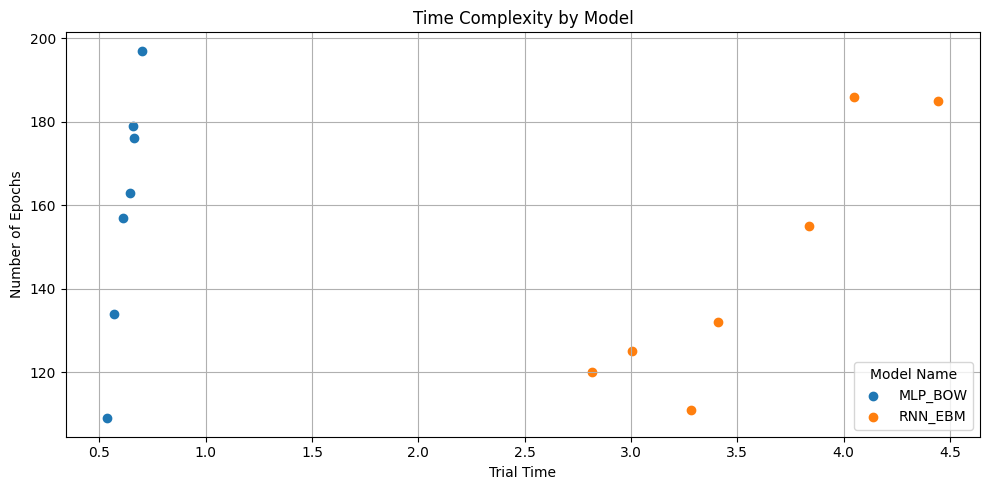

In [50]:
all.plot_time_complexity()